# Section 1: Business Understanding


 ### The IRS-990 dataset originates from United States Internal Revenue Service (IRS). The data includes financial information of non-profit/exempt organizations. For the purposes of this project, the dataset is selected from google public datasets at https://cloud.google.com/bigquery/public-data/irs-990 which makes it queryable easily. The datasets are further narrowed down to only organizations that filed during the year 2016 in order to get active organizations. 
 
 ### IRS spends millions of dollars every year in the processing efforts of paper filing[ref1]. Properly predicting how many organizations would do paper filing vs electronic filing is a question of interest to IRS on an yearly basis. Even IRS website gives this as one of its top guidelines yearly during filing time[ref2]. We would like to come up with a logistic model that can predict this outcome. We will be using ROC curves to determine the prediction accuracy. 

 #### Our scope started with 72 variables and 500,000 records across all states of america (including Canada). We used scatter plots with indicator variables for type of filing (paper vs electronic) to determine most statistically significant variables. Per above exercise we could narrow down the list of variables to 26. We then used random sampling to narrow down the records to 50,000.

[ref1]http://www.nextgov.com/technology-news/2009/09/irs-continues-to-pay-millions-to-process-paper-tax-returns/44867/

[ref2]https://www.irs.gov/newsroom/avoid-common-tax-filing-errors-irs-encourages-efiling-careful-review


# Section 2: Data Meaning Type 
#### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

# Section 3: Data Quality 

#### Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [1]:
ls -ltr ./Lab1/Data

ls: ./Lab1/Data: No such file or directory


In [3]:
# read in the csv file (make sure the file path is appropriately set. This was /lab1/data folder for my exercise)
# irs 990 data set selected ~32K chosed for this exercise of total ~560k found from the data sets of interest from
# google cloud public data set

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import numpy as np
import seaborn as sns

df = pd.read_csv("Data/reqfields_irs_990_data_6pct.csv") 
df.head()

,ein,name,street,city,state,zip,affiliation,deductibility,activity,organization,...,elf,tax_pd,subseccd,totrevnue,totliabend,filedf990tcd,gftgrntsrcvd170,grsrcptsrelated170,exceeds1pct509,grsinc509
0,10017496,AGAMENTICUS YACHT CLUB OF,PO BOX 534,YORK HA,ME,03911-0534,3,1,149000000,1,...,Y,201512,3,110522,179,N,0,0,0,9324
1,10027746,BENEVOLENT & PROTECTIVE O,86 MAIN ST,HOULTON,ME,04730-2121,9,1,279265000,5,...,N,201603,8,0,35013,Y,0,0,0,0
2,10027748,BENEVOLENT & PROTECTIVE O,1945 CONGRESS ST,PORTLAN,ME,04102-1903,9,1,279265000,5,...,N,201603,8,0,264228,Y,0,0,0,0
3,10028850,BERWICK CEMETERY ASSOCIAT,PO BOX 227,BERWICK,ME,03901-0227,3,1,0,1,...,N,201203,13,28965,0,N,0,0,0,0
4,10096117,ISLAND COUNTRY CLUB,442 SUNSET RD,DEER IS,ME,04627-3869,3,2,0,1,...,Y,201512,7,122726,5923,N,0,0,0,0


In [4]:
# Let's investigate if we have successfully imported all the data from the csv into the panda's dataframe

print("Total no. of (Obersations, Features) are: ", df.shape) # get no. of observations and no. of features

print("\n") # enter new blank line      

print("The Feature list is: ", df.columns)  # display and verify all feature names


Total no. of (Obersations, Features) are:  (31826, 27)


The Feature list is:  Index(['ein', 'name', 'street', 'city', 'state', 'zip', 'affiliation',
       'deductibility', 'activity', 'organization', 'asset_cd', 'income_cd',
       'filing_req_cd', 'acct_pd', 'asset_amt', 'income_amt', 'revenue_amt',
       'elf', 'tax_pd', 'subseccd', 'totrevnue', 'totliabend', 'filedf990tcd',
       'gftgrntsrcvd170', 'grsrcptsrelated170', 'exceeds1pct509', 'grsinc509'],
      dtype='object')


In [5]:
# review top 6 observations and do sanity checks
# Carefully evaluate the Categorical, Ordinal, Continuous data - and change the data type as appropriate (in the next sections)
# example: 'ein' is an integer here, but we can't do numerical analysis  - change the data type to String
#           same with ' affiliation', organization' and few other feature - in the next sections

df.head()

,ein,name,street,city,state,zip,affiliation,deductibility,activity,organization,...,elf,tax_pd,subseccd,totrevnue,totliabend,filedf990tcd,gftgrntsrcvd170,grsrcptsrelated170,exceeds1pct509,grsinc509
0,10017496,AGAMENTICUS YACHT CLUB OF,PO BOX 534,YORK HA,ME,03911-0534,3,1,149000000,1,...,Y,201512,3,110522,179,N,0,0,0,9324
1,10027746,BENEVOLENT & PROTECTIVE O,86 MAIN ST,HOULTON,ME,04730-2121,9,1,279265000,5,...,N,201603,8,0,35013,Y,0,0,0,0
2,10027748,BENEVOLENT & PROTECTIVE O,1945 CONGRESS ST,PORTLAN,ME,04102-1903,9,1,279265000,5,...,N,201603,8,0,264228,Y,0,0,0,0
3,10028850,BERWICK CEMETERY ASSOCIAT,PO BOX 227,BERWICK,ME,03901-0227,3,1,0,1,...,N,201203,13,28965,0,N,0,0,0,0
4,10096117,ISLAND COUNTRY CLUB,442 SUNSET RD,DEER IS,ME,04627-3869,3,2,0,1,...,Y,201512,7,122726,5923,N,0,0,0,0


In [6]:
# display bottom 6 observations and do sanity checks 

df.tail()

,ein,name,street,city,state,zip,affiliation,deductibility,activity,organization,...,elf,tax_pd,subseccd,totrevnue,totliabend,filedf990tcd,gftgrntsrcvd170,grsrcptsrelated170,exceeds1pct509,grsinc509
31821,996008853,DELTA GAMMA FRATERNITY,1221 VICTORIA ST APT 3101,HONOLULU,HI,96814-1441,9,2,34922036,5,...,N,201506,7,85,0,N,0,0,0,0
31822,996012378,HUI NOEAU,2841 BALDWIN AVE,MAKAWAO,HI,96768-9642,3,1,119000000,1,...,N,201506,3,352544,142933,N,2087901,2761509,0,0
31823,996015948,LEEWARD KAI CANOE CLUB,86-117 LEIHOKU ST,WAIANAE,HI,96792-2986,3,2,349317298,5,...,N,201512,3,0,0,N,0,0,0,0
31824,996046220,LOCAL 665 I A T S E HEALTH AND WELFARE FUND,222 VINEYARD ST PH 4 # PH-4,HONOLULU,HI,96813-2456,3,2,264000000,2,...,Y,201505,9,2663218,40450,N,0,0,0,0
31825,996048709,JOHN T WATERHOUSE SHARE NO 3 TRUST,PO BOX 3708,HONOLULU,HI,96811-3708,3,1,998000000,2,...,N,201412,3,0,0,N,0,0,0,0


In [7]:
# Let's investigate the dataframe contents: features, no. of valid entries and data types
# the dataframe has 31826 entries, most features matches (valid no of entries, but some don't 
# - let's examine and take appropriate clean ups)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31826 entries, 0 to 31825
Data columns (total 27 columns):
ein                   31826 non-null int64
name                  31826 non-null object
street                31826 non-null object
city                  31826 non-null object
state                 31798 non-null object
zip                   31826 non-null object
affiliation           31826 non-null int64
deductibility         31826 non-null int64
activity              31826 non-null int64
organization          31826 non-null int64
asset_cd              31826 non-null int64
income_cd             31826 non-null int64
filing_req_cd         31826 non-null int64
acct_pd               31826 non-null int64
asset_amt             31795 non-null float64
income_amt            31795 non-null float64
revenue_amt           31772 non-null float64
elf                   31826 non-null object
tax_pd                31826 non-null int64
subseccd              31826 non-null int64
totrevnue          

Looking at the output, we need to examine the missing and non-us values for **state** 
 
Numerical variables **asset_amt*, *income_amt*, *revenue_amt** have some missing values (but negligible number of observations in this sample, we will set them to NaN or 0s, and will probable include or exclude during analysis)

In [8]:
# just an exmaple to show how the categorical features like 'ein' summarized, if the data type is unchanged to string

df.describe()

,ein,affiliation,deductibility,activity,organization,asset_cd,income_cd,filing_req_cd,acct_pd,asset_amt,income_amt,revenue_amt,tax_pd,subseccd,totrevnue,totliabend,gftgrntsrcvd170,grsrcptsrelated170,exceeds1pct509,grsinc509
count,3.182600e+04,31826.000000,31826.000000,3.182600e+04,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,3.179500e+04,3.179500e+04,3.177200e+04,31826.000000,31826.000000,3.182600e+04,3.182600e+04,3.182600e+04,3.182600e+04,3.182600e+04,3.182600e+04
mean,4.512349e+08,3.748005,1.198674,2.036712e+08,1.599541,3.946113,3.928141,1.282411,9.598347,9.036894e+06,6.377635e+06,4.377747e+06,201514.853013,4.067586,3.126079e+06,4.076712e+06,2.455670e+06,1.328058e+06,4.784074e+04,3.044555e+04
std,2.509840e+08,1.994234,0.427300,2.991338e+08,1.407188,2.058612,1.873691,0.745043,3.008021,1.208878e+08,2.033690e+08,5.942051e+07,62.403369,2.713370,4.629372e+07,6.522561e+07,3.948427e+07,8.320307e+07,2.658030e+06,6.758950e+05
min,1.001750e+07,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-1.878345e+07,200412.000000,2.000000,-1.230870e+05,-1.909175e+06,0.000000e+00,-3.749060e+05,0.000000e+00,-1.232760e+05
25%,2.516349e+08,3.000000,1.000000,0.000000e+00,1.000000,3.000000,3.000000,1.000000,6.000000,3.480600e+04,5.667150e+04,4.521500e+04,201508.000000,3.000000,2.437750e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.208087e+08,3.000000,1.000000,4.000000e+07,1.000000,4.000000,4.000000,1.000000,12.000000,1.702170e+05,1.601690e+05,1.357330e+05,201512.000000,3.000000,5.442100e+04,8.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.961999e+08,3.000000,1.000000,2.983173e+08,1.000000,5.000000,5.000000,1.000000,12.000000,9.001100e+05,6.435035e+05,5.436268e+05,201512.000000,3.000000,1.639225e+05,7.941775e+04,8.882975e+04,0.000000e+00,0.000000e+00,0.000000e+00
max,9.960487e+08,9.000000,4.000000,9.990000e+08,6.000000,9.000000,9.000000,14.000000,12.000000,1.026879e+10,3.415169e+10,4.895423e+09,201611.000000,29.000000,3.799991e+09,4.314885e+09,4.617715e+09,1.441239e+10,4.023726e+08,6.238156e+07


In [9]:
# import numpy functions to make use of some wonderful functions that it provides
import numpy as np

# replace any blanks as 'nan' values, so those can be manipulated better (we will deal with missing values later)
df = df.replace(to_replace='?',value=np.nan)

# convert boolean to numeric to get summary stats
df = df.replace(to_replace='N',value=0) 
df = df.replace(to_replace="Y", value=1)

In [10]:
# As we noticed earlier, some of the categorical data is stored as numberical data (such as 'ein')
# That's not good. It means we need to change those data types in order to encode the variables properly. 
# Right now Pandas thinks all of our variables are nominal!

# let's start by first changing the numeric values to be floats
continuous_features = ['activity', 'asset_amt', 'revenue_amt', 'totrevnue', 'totliabend', 'gftgrntsrcvd170',
                      'grsrcptsrelated170', 'exceeds1pct509', 'grsinc509']

# the oridnal values to be integers
ordinal_features = ['elf', 'filedf990tcd']

# keep the as non mumerical and other codes as categorical features
categorical_features = ['ein', 'name', 'street', 'city', 'state', 'zip', 'affiliation', 'deductibility',
                 'organization', 'asset_cd', 'income_cd', 'filing_req_cd', 'acct_pd', 'tax_pd', 'subseccd'];

# use the "astype" function to change the variable type
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int32)
df[categorical_features] = df[categorical_features].astype(str)

df.info() # now our data looks better!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31826 entries, 0 to 31825
Data columns (total 27 columns):
ein                   31826 non-null object
name                  31826 non-null object
street                31826 non-null object
city                  31826 non-null object
state                 31826 non-null object
zip                   31826 non-null object
affiliation           31826 non-null object
deductibility         31826 non-null object
activity              31826 non-null float64
organization          31826 non-null object
asset_cd              31826 non-null object
income_cd             31826 non-null object
filing_req_cd         31826 non-null object
acct_pd               31826 non-null object
asset_amt             31795 non-null float64
income_amt            31795 non-null float64
revenue_amt           31772 non-null float64
elf                   31826 non-null int32
tax_pd                31826 non-null object
subseccd              31826 non-null object
totrevnu

In [11]:
# Let's do sanity checks again on the data
df.head()

,ein,name,street,city,state,zip,affiliation,deductibility,activity,organization,...,elf,tax_pd,subseccd,totrevnue,totliabend,filedf990tcd,gftgrntsrcvd170,grsrcptsrelated170,exceeds1pct509,grsinc509
0,10017496,AGAMENTICUS YACHT CLUB OF,PO BOX 534,YORK HA,ME,03911-0534,3,1,149000000.0,1,...,1,201512,3,110522.0,179.0,0,0.0,0.0,0.0,9324.0
1,10027746,BENEVOLENT & PROTECTIVE O,86 MAIN ST,HOULTON,ME,04730-2121,9,1,279265000.0,5,...,0,201603,8,0.0,35013.0,1,0.0,0.0,0.0,0.0
2,10027748,BENEVOLENT & PROTECTIVE O,1945 CONGRESS ST,PORTLAN,ME,04102-1903,9,1,279265000.0,5,...,0,201603,8,0.0,264228.0,1,0.0,0.0,0.0,0.0
3,10028850,BERWICK CEMETERY ASSOCIAT,PO BOX 227,BERWICK,ME,03901-0227,3,1,0.0,1,...,0,201203,13,28965.0,0.0,0,0.0,0.0,0.0,0.0
4,10096117,ISLAND COUNTRY CLUB,442 SUNSET RD,DEER IS,ME,04627-3869,3,2,0.0,1,...,1,201512,7,122726.0,5923.0,0,0.0,0.0,0.0,0.0


#### Let's investigate the few **state** and **zip** feature's for non- US entities

In [12]:
# find out the missing values and data in state
df['state'].value_counts(dropna=False) 

CA     3573
NY     2395
TX     1930
PA     1565
FL     1476
IL     1337
OH     1264
MA     1075
NJ      967
MI      921
VA      873
NC      821
GA      783
MN      732
WA      728
IN      703
CO      678
MD      667
WI      635
MO      612
TN      520
OR      507
CT      487
AZ      433
LA      402
IA      398
SC      390
DC      381
AL      349
OK      347
KY      342
KS      310
NE      246
AR      238
MS      221
ME      214
NM      209
WV      203
MT      186
UT      183
HI      169
NV      157
NH      145
RI      145
ID      142
AK      136
SD      131
ND      122
VT      121
DE       94
WY       84
PR       31
nan      28
VI       15
GU        2
MP        1
AE        1
AP        1
Name: state, dtype: int64

In [13]:
# we have also noticed earlier there are some zip codes with '00000-000' and non-us states from above

df_foreign = df.loc[(df['zip'] == '00000-0000') | df['state'].isin(['VI', 'GU', 'MP', 'AP', 'PW', 'AE']) | (df['state']=='nan')]

# print the foreign data subset to make sure all the right records captured
print(df_foreign[['ein', 'state','zip']])

             ein state         zip
1417    60706038   nan  00000-0000
3277   161574588   nan  00000-0000
8412   261170858    AP  96376-0011
10898  306060989   nan  00000-0000
11257  311451739   nan  00000-0000
11276  311490115   nan  00000-0000
11296  311529945   nan  00000-0000
11369  311638318   nan  00000-0000
11397  311672361   nan  00000-0000
13529  363898502   nan  00000-0000
15738  412136422    VI  00821-0411
19751  474102582   nan  00000-0000
24962  660426307    VI  00802-1373
24963  660436786   nan  00000-0000
24968  660503252    GU  96921-2511
24970  660516021    VI  00830-9587
24971  660520053    VI  00803-5200
24983  660637620    VI  00830-9587
24984  660640378    VI  00831-0037
24985  660646557    VI  00824-0331
24988  660719977    VI  00851-4302
24989  660722922    MP  96950-7126
24991  660729908    VI  00803-2787
24994  660749419    VI  00820-5184
24997  660764933    VI  00820-5179
24998  660772147    VI  00804-0441
24999  660782988    VI  00824-2544
25000  660798103    

In [14]:
# capture index of the foreign data set we are about to drop from the final clean data set.

df.index[df_foreign.index]

Int64Index([ 1417,  3277,  8412, 10898, 11257, 11276, 11296, 11369, 11397,
            13529, 15738, 19751, 24962, 24963, 24968, 24970, 24971, 24983,
            24984, 24985, 24988, 24989, 24991, 24994, 24997, 24998, 24999,
            25000, 25003, 25004, 29463, 29562, 31711, 31712, 31713, 31714,
            31716, 31717, 31718, 31719, 31720, 31722, 31724, 31725, 31727,
            31728, 31729, 31813],
           dtype='int64')

In [15]:
# drop the foreign data set (which as non-us and nan states or '00000-0000' in zip)
df = df.drop(df.index[df_foreign.index])

In [16]:
# now verify the schema again

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31778 entries, 0 to 31825
Data columns (total 27 columns):
ein                   31778 non-null object
name                  31778 non-null object
street                31778 non-null object
city                  31778 non-null object
state                 31778 non-null object
zip                   31778 non-null object
affiliation           31778 non-null object
deductibility         31778 non-null object
activity              31778 non-null float64
organization          31778 non-null object
asset_cd              31778 non-null object
income_cd             31778 non-null object
filing_req_cd         31778 non-null object
acct_pd               31778 non-null object
asset_amt             31747 non-null float64
income_amt            31747 non-null float64
revenue_amt           31724 non-null float64
elf                   31778 non-null int32
tax_pd                31778 non-null object
subseccd              31778 non-null object
totrevnu

#### Now focusing on the numerical data which has null values. There are about 54 records which will drop (imputing median or mean or other calculated values may skew the any analysis we plan to do in future. These records are negligible considring the large final data set we will have).

In [17]:
print("#Null values in asset_amt feature: ", df[('asset_amt')].isnull().sum())
print("#Null values in income_amt feature: ", df[('income_amt')].isnull().sum())
print("#Null values in revenue_amt feature: ", df[('revenue_amt')].isnull().sum())

#Null values in asset_amt feature:  31
#Null values in income_amt feature:  31
#Null values in revenue_amt feature:  54


In [18]:
# we will verify the null values from asset_amt, income_amt and revenue_amt & drop them as these are only 54 observations
df_null_amt= df.loc[df[('asset_amt')].isnull() | df[('income_amt')].isnull() | df[('revenue_amt')].isnull()] 

# print the null_amt data subset to ensure right observations are dropped
print(df_null_amt[['ein', 'asset_amt','income_amt', 'revenue_amt']])

             ein   asset_amt  income_amt  revenue_amt
230     10918626         NaN         NaN          NaN
895     43050936         NaN         NaN          NaN
1062    43481558   9836919.0       847.0          NaN
1128    43650820   3956050.0   1126357.0          NaN
2953   146018155   5250513.0    450015.0          NaN
4761   205840658         2.0     28907.0          NaN
5143   221752792         NaN         NaN          NaN
5281   222450149         NaN         NaN          NaN
5464   222846440         NaN         NaN          NaN
6779   237109916         NaN         NaN          NaN
6849   237130151         NaN         NaN          NaN
6976   237170672    931736.0   1302568.0          NaN
7977   251674754         NaN         NaN          NaN
8043   251798379         NaN         NaN          NaN
9019   263414936     67603.0    213387.0          NaN
9510   270494184     48805.0     50001.0          NaN
10171  273019789    302322.0     84762.0          NaN
11911  330732845         NaN

In [19]:
# capture index of the foreign data set we are about to drop from the final clean data set.

df.index[df_null_amt.index]

Int64Index([  230,   895,  1062,  1128,  2954,  4763,  5145,  5283,  5466,
             6781,  6851,  6978,  7979,  8045,  9022,  9513, 10174, 11920,
            11980, 11982, 12105, 12620, 13856, 13859, 14261, 14879, 15422,
            15426, 15587, 15615, 16338, 16841, 17739, 17772, 18439, 18648,
            18701, 18723, 19770, 19836, 19896, 19984, 20033, 20281, 21024,
            21519, 22301, 24427, 26050, 26768, 27590, 28068, 28555, 31123],
           dtype='int64')

In [20]:
# drop the null data subset from the original data set df as we confirmed the indexes & print the final and cleaned dataset information

df_final = df.drop(df.index[df_null_amt.index])

In [21]:
# drop the null data subset from the original data set df as we confirmed the indexes & print the final and cleaned dataset information
# df_final = df.drop(df.index[df_null_amt.index]) -- this didn't work, need to figure out.

df_final = df.dropna(axis=0, how='any')

In [22]:
# verify any nulls (or nan's remaining to clean up.)
df_final.isnull().sum()

ein                   0
name                  0
street                0
city                  0
state                 0
zip                   0
affiliation           0
deductibility         0
activity              0
organization          0
asset_cd              0
income_cd             0
filing_req_cd         0
acct_pd               0
asset_amt             0
income_amt            0
revenue_amt           0
elf                   0
tax_pd                0
subseccd              0
totrevnue             0
totliabend            0
filedf990tcd          0
gftgrntsrcvd170       0
grsrcptsrelated170    0
exceeds1pct509        0
grsinc509             0
dtype: int64

In [23]:
# Let's look at the schema of our final and claned data set - we don't have null values now, other columns 
# may need to be massaged depending on the use case we plan to use.

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31724 entries, 0 to 31825
Data columns (total 27 columns):
ein                   31724 non-null object
name                  31724 non-null object
street                31724 non-null object
city                  31724 non-null object
state                 31724 non-null object
zip                   31724 non-null object
affiliation           31724 non-null object
deductibility         31724 non-null object
activity              31724 non-null float64
organization          31724 non-null object
asset_cd              31724 non-null object
income_cd             31724 non-null object
filing_req_cd         31724 non-null object
acct_pd               31724 non-null object
asset_amt             31724 non-null float64
income_amt            31724 non-null float64
revenue_amt           31724 non-null float64
elf                   31724 non-null int32
tax_pd                31724 non-null object
subseccd              31724 non-null object
totrevnu

In [25]:
# Writing the final code to local Repository(Synced with Git Hub)
df_final.to_csv('df_final_lab1_dataset.csv')

### Now we have cleaned and verified data set for further analysis. Fewer than 200 observations have been dropped, which are negligible per the analysis done during the clean up.

# Section 4: Visualize appropriate stats (e.g., range, mode, mean, median, variance, counts)
##### Basic Stats:for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

Facets are being used in this section to describe features. Instructions from the below link will have to be followed to set up appropriate environment for facets to run in Jupyter notebook.

Reference link: https://github.com/PAIR-code/facets

The below facets are interactive and shows simple statistics for all types of featuers. It is evident that missing values across features is 0%, suggesting good data quality.

Further count of zeros and five stat summary is provided in the facets for numerical features along with top ferquency measures for categorical variables.

##### Observation 01
63% of the total fillings were made electronically.

##### Observation 02
Average annual income for the NPO's is about 6.23M and majority of the non-profit organizations are deriving their income through either NPO related activities or gifts('gftgrntsrcvd170') that are non taxable. This can be seen by observing 'filedf990tcd'(Form 990-T filed?) feature, that has zero's for 93.8% of the records. Form 990-T suggests that there is no profitable unrelated business income for these organizations.

##### Observation 03
Top frequency asset code being 4($ 100K - $ 500K) shows most of the organizations have book value of assests under $ 500K while average asset value is at $ 8.87 M

##### Observation 04
Top frequency of feature 'affilication' is 3, indicating that most organizations are independent organizations or independent auxiliaries (i.e., not affiliated with a National, Regional, or Geographic grouping of
organizations). 

In [24]:
# Adding the facets overview python code to the python path taken from https://pair-code.github.io/facets/
import sys
sys.path.append('facets/facets_overview/python')

In [25]:
import numpy as np

In [26]:
# Calculate the feature statistics proto from the datasets and stringify it for use in facets overview
from generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import base64

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'final', 'table': df_final}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [27]:
# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Section 5: Visualize Attributes

#### Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

In [30]:
# 63% of the companies do e-filing
percentFiledElec = float(len(df_final[df_final.elf != 0]))/len(df) * 100
print ("percentFiledElec")
print (percentFiledElec)

percentFiledElec
63.21983762351312


In [31]:
# The following code shows the mean of the data grouped by elf
df_final.groupby(by=[df.elf,df.state])
df_elfgrp=df_final.groupby(by=df_final.elf)
df.groupby(by=df_final.elf).mean()

,activity,asset_amt,income_amt,revenue_amt,elf,totrevnue,totliabend,filedf990tcd,gftgrntsrcvd170,grsrcptsrelated170,exceeds1pct509,grsinc509
elf,,,,,,,,,,,,
0.0,1.943365e+08,2.243482e+06,1.266110e+06,9.754118e+05,0.0,6.110793e+05,5.707107e+05,0.048307,7.600903e+05,1.225495e+05,5501.506876,8690.535499
1.0,2.092489e+08,1.270400e+07,9.110198e+06,6.121245e+06,1.0,4.567671e+06,5.937464e+06,0.069189,3.432631e+06,2.031761e+06,72601.284221,43175.814236


In [32]:
## Shows the median value , since mean may not work on categorical data
df.groupby(by=df_final.elf).median()

,activity,asset_amt,income_amt,revenue_amt,elf,totrevnue,totliabend,filedf990tcd,gftgrntsrcvd170,grsrcptsrelated170,exceeds1pct509,grsinc509
elf,,,,,,,,,,,,
0.0,30801000.0,77849.0,93054.5,78748.5,0,38542.5,0.0,0,0.0,0.0,0.0,0.0
1.0,59000000.0,270847.5,229393.5,195382.0,1,67565.5,4784.0,0,0.0,0.0,0.0,0.0


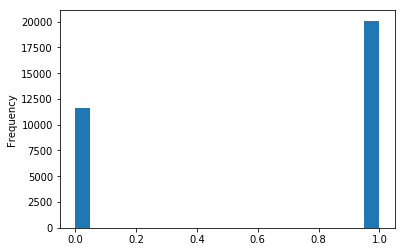

In [33]:
# histogram of elf
df_final.elf.plot.hist(stacked=True, bins=20)

In [ ]:
elf = 1 reprresents e-filed and 0 represents paper filed

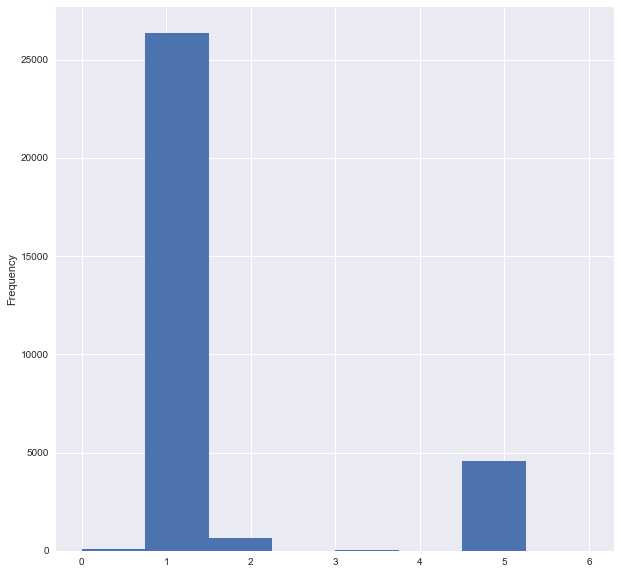

In [129]:
# Histogram of org data
df_final.organization.plot.hist(stacked=True, bins=8)

In [ ]:
Shows that value 1 which represents Corporation has highest distribution.

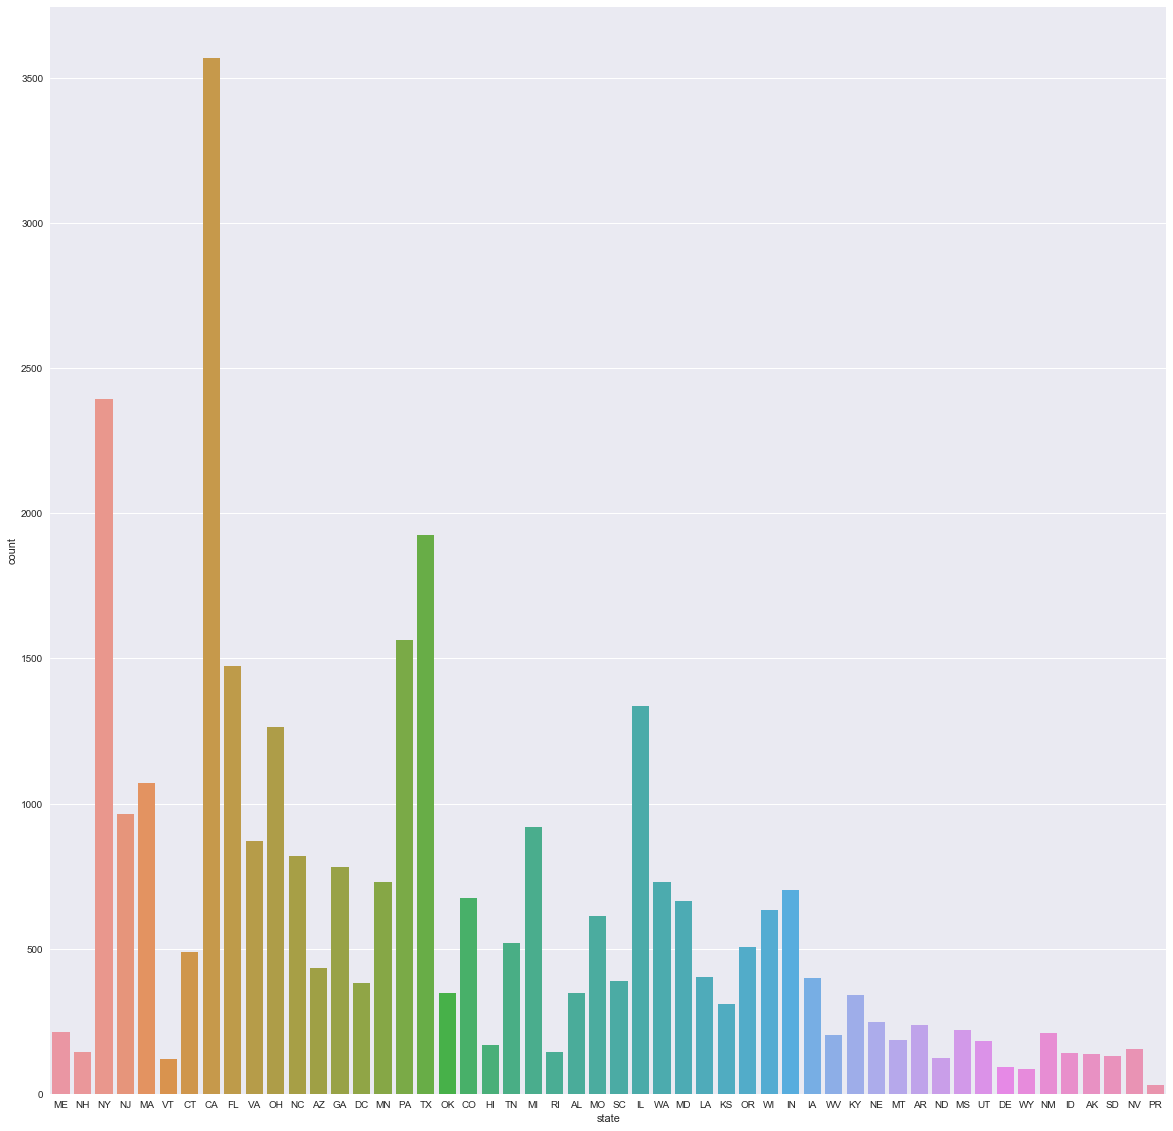

In [35]:
# Plot state distribution
sns.set(rc={'figure.figsize':(20,20)})
ax = sns.countplot(x="state", data=df_final,orient="v")

C:\Users\NithyaDoss\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


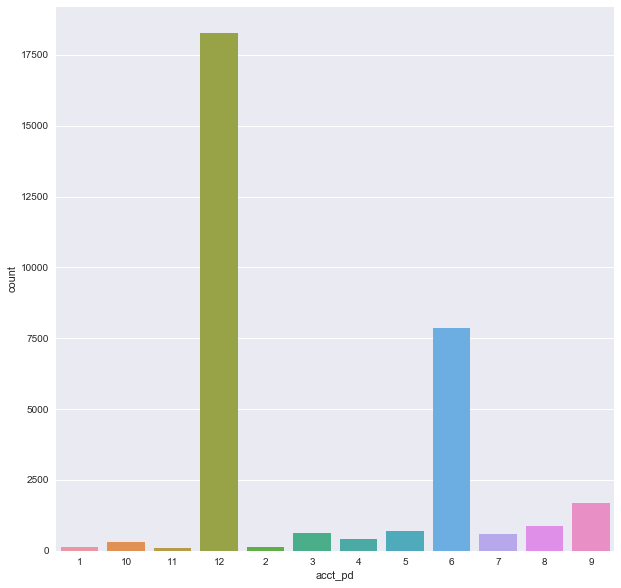

In [130]:
#Plot accounting period 
sns.countplot(x="acct_pd", data=df_final)

In [ ]:
Shows that the accounting period is generally in december or june . By the end of half year or end of the year , 
the accounting is closed for tax filing

C:\Users\NithyaDoss\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


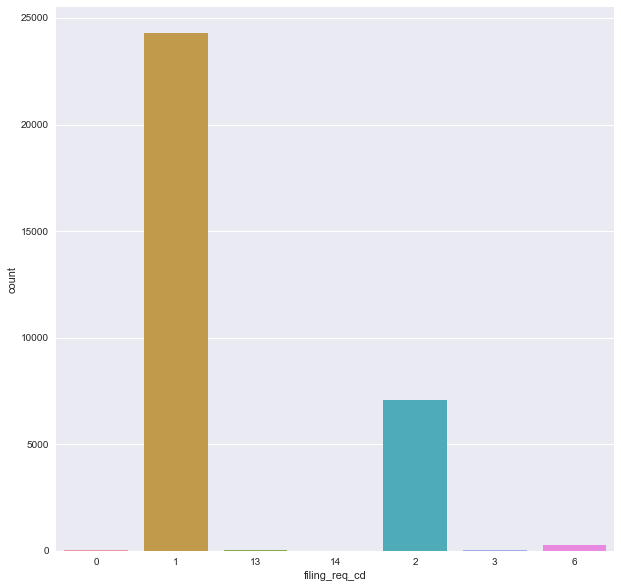

In [131]:
#Plot Filing required code
sns.countplot(x="filing_req_cd", data=df_final)

In [ ]:
This indicates 01 has high distribution means 990 (all other) or 990EZ return is more among companies from the sample , 
followed by 2 which is  - Not required to file (income less than $25,000) 

# Section 6: Explore Joint Attributes

#### Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


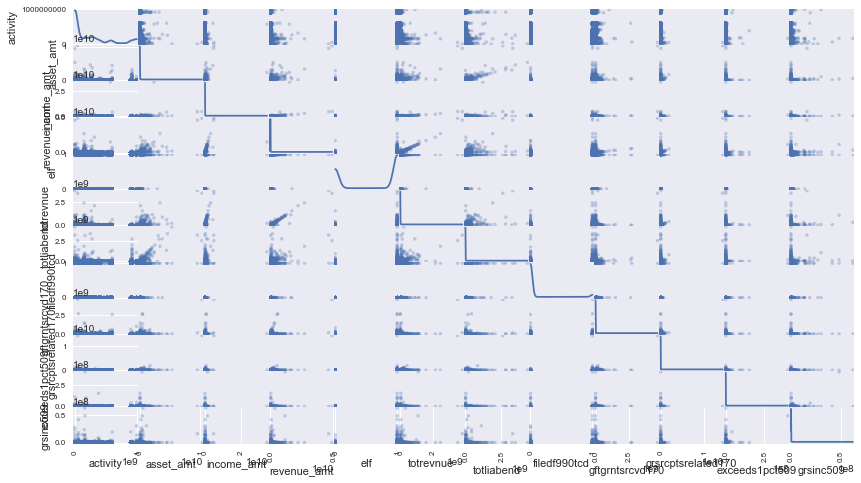

In [37]:
## Scatter matrix with kde
pd.scatter_matrix(df_final, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
The above scatter matrix shows the linear relation between the various attributes . We can dig into details in the 
next couple of plots 

In [38]:
## Splitting to continuous features 1 and 2 to look into details
continuous_features1 = ['activity', 'asset_amt', 'revenue_amt', 'totrevnue']
continuous_features2 = ['totliabend', 'gftgrntsrcvd170','asset_amt',
                      'grsrcptsrelated170', 'exceeds1pct509', 'grsinc509']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


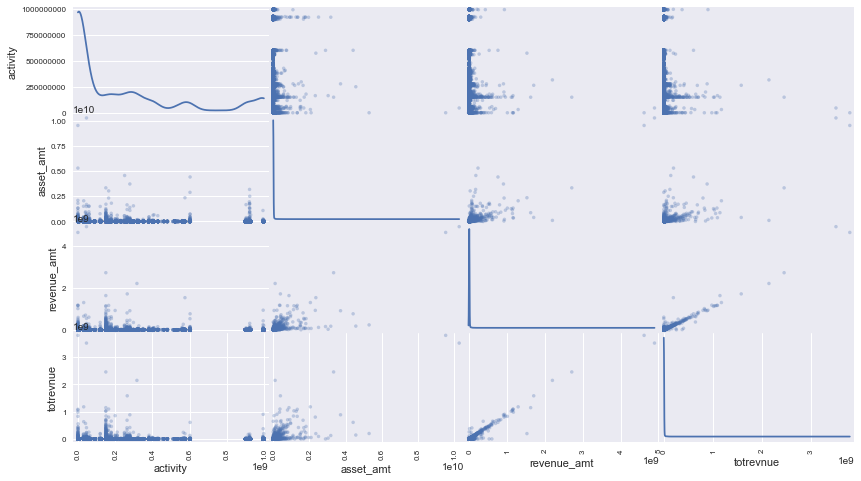

In [39]:
## Plot the first set 
pd.scatter_matrix(df_final[continuous_features1], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
Shows that it is linear between revenue amt and tot revenue , asset_amt vs revenue_amt , tot_revenue vs asset_amt. We can 
only confirm when we run some correlation on it. 

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


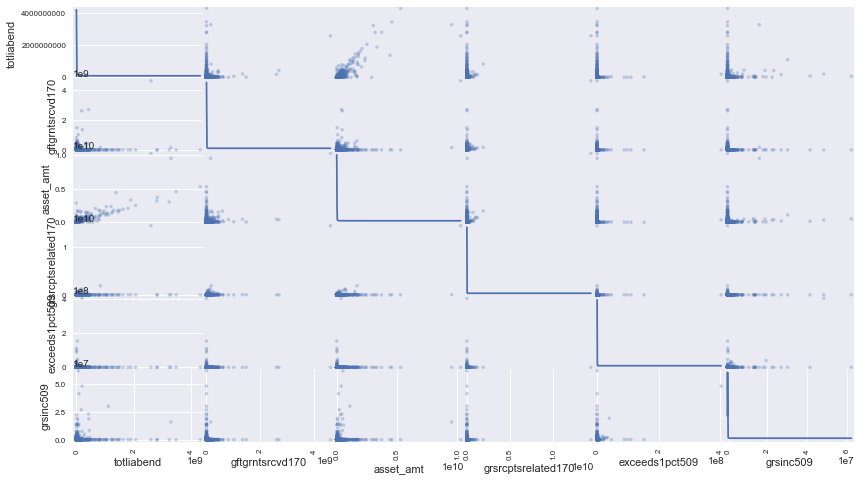

In [40]:
pd.scatter_matrix(df_final[continuous_features2], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
Cant confirm the linearity is true based on the plot above for the attributes listed in the scatter plot matrix


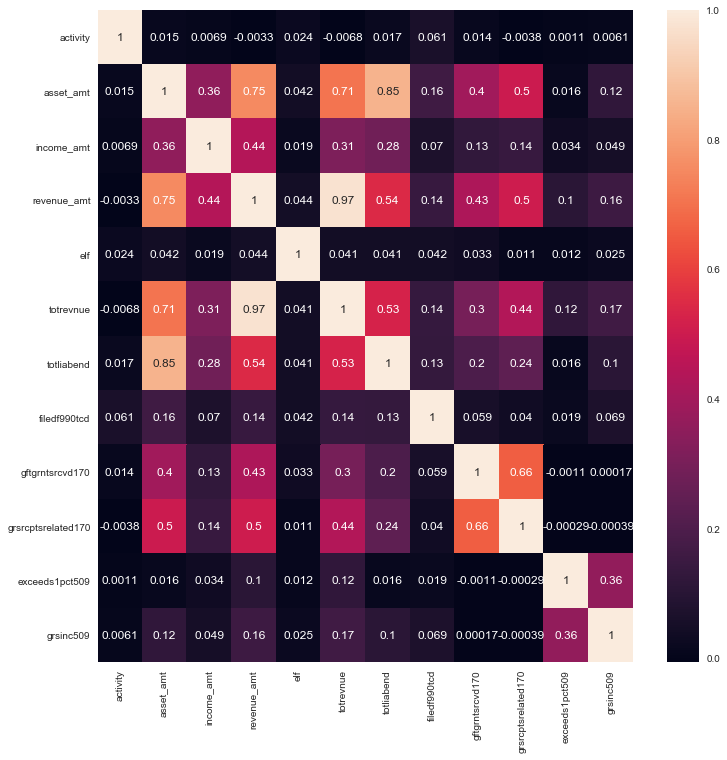

In [41]:
## Heat Map
sns.set(rc={'figure.figsize':(12,12)})

corr = df_final.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
Based on the above Correlation heat map , we see that there is a strong correlation between totrevenue and revenue_amt .
The correlation between grocery and detergents is high. Similarly:

Variables With High Correlation:
totrevnue and revenue_amt.

Variables With Medium Correlation:
totliabend and asset_amt
totrevnue and asset_amt
revenue_amt and asset_amt
grsrcptsrelated170 and gftgrntsrcvd170

Variables With Low Correlation:
income_amt and asset_amt
revenue_amt and income_amt
totliabend and revenue_amt
totliabend and totrevnue

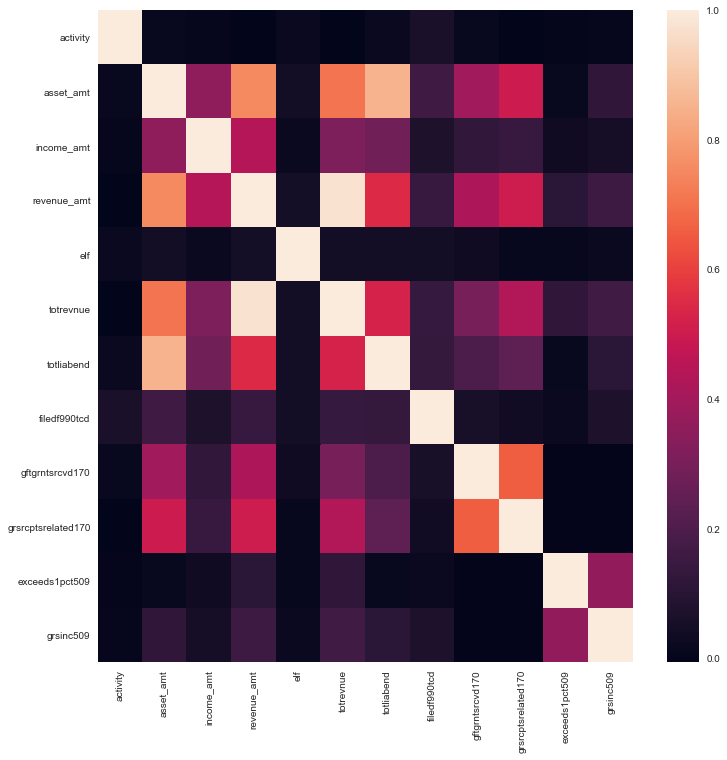

In [45]:
sns.set(rc={'figure.figsize':(12,12)})
corr = df_final.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



In [46]:
# display sum group by state 
df_strev=df_final.groupby(['state']).sum()
df_strev.sort_values(['revenue_amt','income_amt','asset_amt'], ascending=False)

,activity,asset_amt,income_amt,revenue_amt,elf,totrevnue,totliabend,filedf990tcd,gftgrntsrcvd170,grsrcptsrelated170,exceeds1pct509,grsinc509
state,,,,,,,,,,,,
CA,7.332301e+11,3.954377e+10,2.006060e+10,1.502745e+10,2394,9.550262e+09,1.973380e+10,159,1.449423e+10,1.640831e+10,115890455.0,95546065.0
NY,4.922703e+11,2.178181e+10,1.421679e+10,1.170420e+10,1716,7.952015e+09,1.010207e+10,105,8.757796e+09,4.234305e+09,103627913.0,141515392.0
IL,2.682237e+11,2.379712e+10,1.153766e+10,1.026578e+10,724,8.201582e+09,8.438402e+09,108,2.239695e+09,1.572816e+09,48553884.0,113603198.0
PA,3.474230e+11,1.838938e+10,1.061135e+10,8.349485e+09,1021,6.525546e+09,7.735767e+09,119,2.253329e+09,2.446608e+09,119923192.0,101576306.0
FL,2.461536e+11,1.350691e+10,1.079152e+10,5.888185e+09,910,3.647688e+09,5.431688e+09,78,5.772411e+09,4.418297e+08,25538982.0,27786377.0
TX,3.474335e+11,1.351632e+10,6.030382e+09,5.491081e+09,1194,4.397926e+09,9.183554e+09,113,1.705139e+09,4.214074e+08,59501705.0,78125520.0
OH,3.223530e+11,1.190734e+10,7.071852e+09,5.161007e+09,785,4.105641e+09,4.152965e+09,87,1.994891e+09,5.993384e+08,13332540.0,13532406.0
MA,2.100796e+11,6.971476e+09,5.435617e+09,4.782938e+09,709,3.826259e+09,2.556835e+09,73,2.287208e+09,1.110704e+09,416254684.0,66337975.0
DC,7.377928e+10,5.526781e+09,3.753014e+10,4.596133e+09,261,1.568420e+09,3.271665e+09,35,5.758405e+09,2.215999e+08,26936148.0,18906205.0


In [ ]:
Seems like CA,NY,IL,PA,FL,TX have companies whose revenue is HIGH followed by asset amount.

# Section 7: Explore Attributes and Class

#### Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In [47]:
df_elfstgrp=df_final.groupby(['elf','state']).size()
df_elfstgrp

elf  state
0    AK         64
     AL        127
     AR         96
     AZ        217
     CA       1173
     CO        221
     CT        148
     DC        120
     DE         35
     FL        563
     GA        304
     HI         77
     IA        140
     ID         55
     IL        611
     IN        335
     KS         94
     KY        141
     LA        147
     MA        363
     MD        271
     ME         81
     MI        350
     MN        265
     MO        231
     MS         79
     MT         45
     NC        338
     ND         47
     NE         75
              ... 
1    MI        569
     MN        463
     MO        380
     MS        142
     MT        141
     NC        480
     ND         75
     NE        171
     NH         84
     NJ        610
     NM        127
     NV        103
     NY       1716
     OH        785
     OK        197
     OR        288
     PA       1021
     PR          6
     RI        102
     SC        250
     SD         88
 

In [48]:
df_final['organization']=df_final['organization'].astype(np.int32)
df_sub = df_final[['elf','totrevnue','asset_amt','income_amt','organization']]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Taking subset of the data for further analysis

In [49]:
#Normalize the data for analysis on the same scale
df_norm = (df_sub-df_sub.min())/(df_sub.max()-df_sub.min())
print (df_norm.describe())

                elf     totrevnue     asset_amt    income_amt  organization
count  31724.000000  31724.000000  31724.000000  31724.000000  31724.000000
mean       0.633274      0.000853      0.000864      0.000183      0.266554
std        0.481918      0.012196      0.011633      0.005932      0.234525
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000033      0.000003      0.000002      0.166667
50%        1.000000      0.000047      0.000017      0.000005      0.166667
75%        1.000000      0.000076      0.000088      0.000019      0.166667
max        1.000000      1.000000      1.000000      1.000000      1.000000


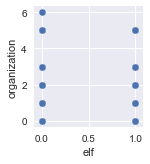

In [50]:
# Pair wise plots 
pp = sns.pairplot(data=df_final,
                  y_vars=['organization'],
                  x_vars=['elf'])

In [ ]:
Plot the org data Vs elf . Here elf is our response variable. Based on this we can tell 6 organizations file through paper 
and 5 do e-filing.

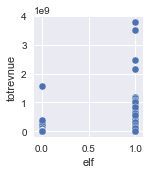

In [51]:
pp = sns.pairplot(data=df_final,
                  y_vars=['totrevnue'],
                  x_vars=['elf'])

In [ ]:
Plot the totrevenue data Vs elf .  Based on this we can tell more organizations with high revenue do efiling

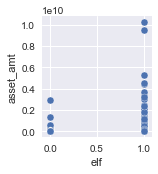

In [52]:
pp = sns.pairplot(data=df_final,
                  y_vars=['asset_amt'],
                  x_vars=['elf'])

In [ ]:
Plot the asset_amt data Vs elf .  Based on this we can tell more organizations with high asset amounts do efiling

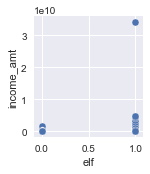

In [53]:
pp = sns.pairplot(data=df_final,
                  y_vars=['income_amt'],
                  x_vars=['elf'])

In [ ]:
Plot the income amount data Vs elf .  Based on this we can tell more organizations with high income amounts do efiling

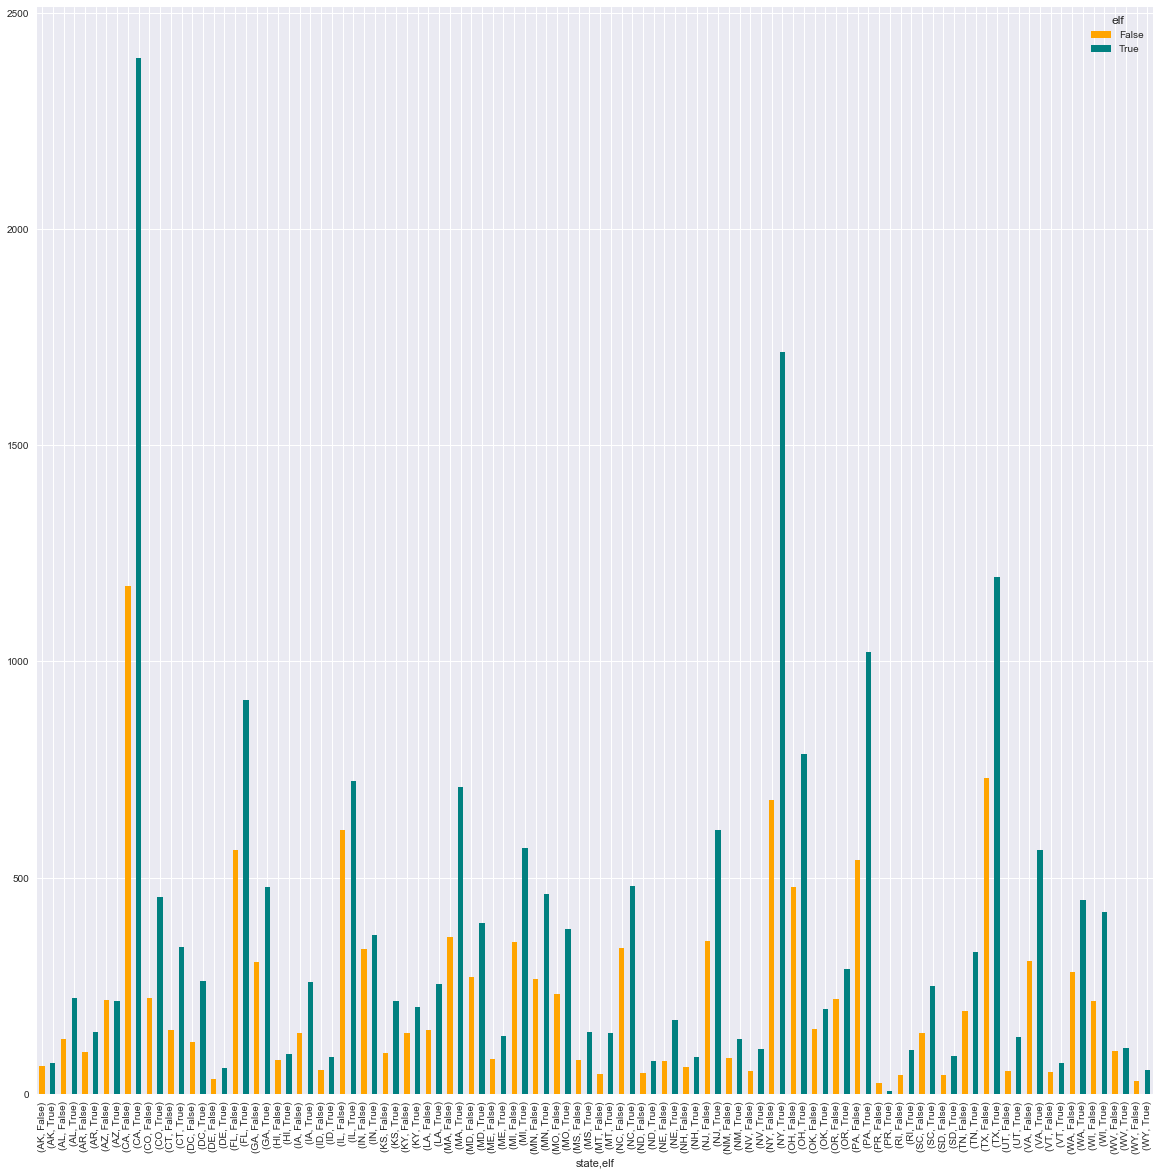

In [132]:
 pd.crosstab([df_final['state'],df_final['elf']], df_final.elf.astype(bool))
stcnt.plot(figsize=(20,20),kind='bar', stacked=True, color=['orange','teal'])

# Section 8: New Features

#### Are there other features that could be added to the data or created from existing features? Which ones?

# Section 9: Exceptional Work 
    
#### You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

In [59]:
%%HTML

<div class='tableauPlaceholder' id='viz1517121461936' style='position: relative'><noscript><a href='#'><img alt='Geo ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IR&#47;IRS-scatter&#47;Geo&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='IRS-scatter&#47;Geo' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IR&#47;IRS-scatter&#47;Geo&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1517121461936');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>